# **ML EXP2 - Study of ML Libraries and Tools Python Libraries Tensorflow Keras**

[Yash Ashok Shirsath (TE AI&DS 74/201101006)](https://yashashokshirsath.netlify.app/)

In [39]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [40]:
mnist = keras.datasets.mnist  # Taking MNIST Dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [41]:
train_images = train_images / 255.0
test_images = test_images / 255.0 # Preprocessing

In [42]:
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatting 28x28 images to a 1D array
    layers.Dense(128, activation='relu'),          # 128 neurons and ReLU activation
    layers.Dropout(0.2),                            # Dropout layer to reduce overfitting
    layers.Dense(10, activation='softmax')          # 10 neurons for 10 classes and softmax activation
])

In [43]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])   # model compile

In [44]:
history = model.fit(train_images, train_labels, epochs=5, validation_split=0.2) # training the  model

Epoch 1/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3184 - accuracy: 0.9076 - val_loss: 0.1524 - val_accuracy: 0.9569
Epoch 2/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1552 - accuracy: 0.9548 - val_loss: 0.1238 - val_accuracy: 0.9622
Epoch 3/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1141 - accuracy: 0.9656 - val_loss: 0.0940 - val_accuracy: 0.9718
Epoch 4/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0928 - accuracy: 0.9711 - val_loss: 0.0866 - val_accuracy: 0.9746
Epoch 5/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0764 - accuracy: 0.9759 - val_loss: 0.0923 - val_accuracy: 0.9716


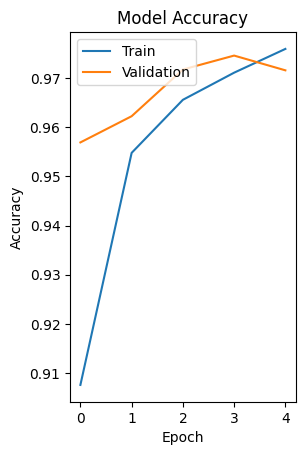

In [45]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')   # in this we plot training acc

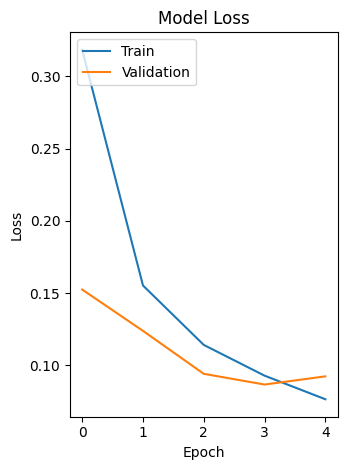

In [46]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')  # training values cross values

plt.tight_layout()
plt.show()

In [47]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"\nTest accuracy: {test_acc}")         # MV & Train Set
print(f"\nTest accuracy: {test_acc*100}")

313/313 [==============================] - 2s 5ms/step - loss: 0.0791 - accuracy: 0.9736

Test accuracy: 0.9735999703407288

Test accuracy: 97.35999703407288


313/313 [==============================] - 2s 5ms/step


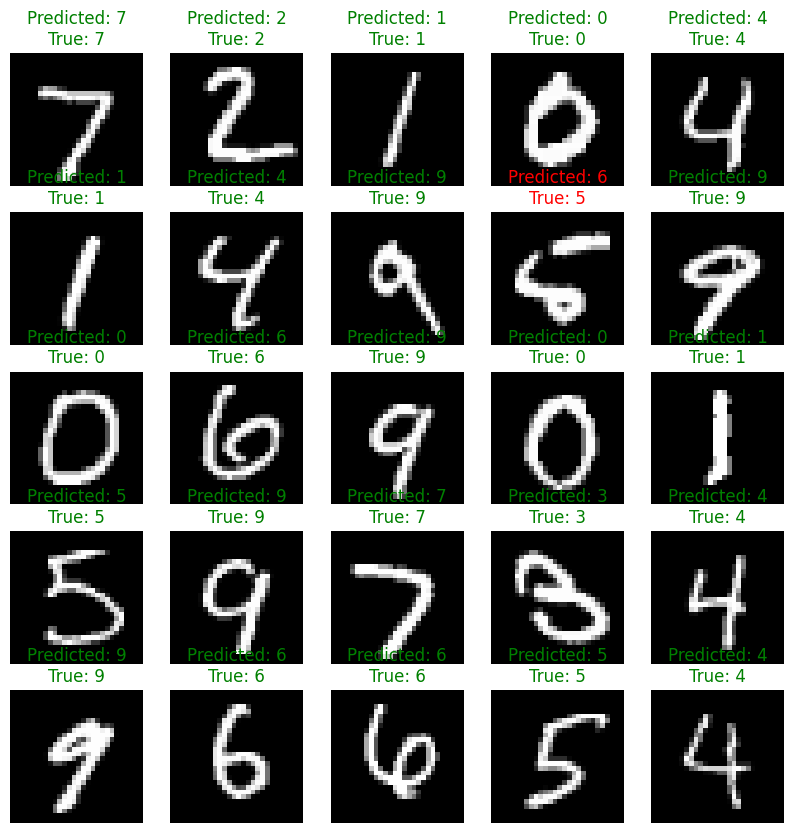

In [48]:
predictions = model.predict(test_images)
num_rows, num_cols = 5, 5
plt.figure(figsize=(10, 10))
for i in range(num_rows * num_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(test_images[i], cmap='gray')
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    plt.title(f'Predicted: {predicted_label}\nTrue: {true_label}', color='green' if predicted_label == true_label else 'red')
    plt.axis('off')
plt.show()      # Viz Few of testing Images